In [1]:
import numpy as np
import pandas as pd
import itertools

import networkx as nx
from networkx.algorithms import bipartite

import pylab
from colour import Color
from pylab import cm
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from bigbang import listserv
from bigbang.analysis.listserv import ListservArchive
from bigbang.analysis.listserv import ListservList
from bigbang.visualisation import graphs
from bigbang.visualisation import lines

In [2]:
mlist_name = "3GPP_TSG_CT_WG4"
mlist = ListservList.from_mbox(
    name=mlist_name,
    filepath=f"path_to_bigbang/archives/3GPP/{mlist_name}.mbox",  # change this to your own folder structure
    include_body=True,
)

mlist.df = mlist.df[mlist.df["from"].notna()]
mlist.df = mlist.df[mlist.df["comments-to"].notna()]

standard_release_info = pd.read_csv(
    "path_to_bigbang/bigbang/analysis/3GPP_standards_release_dates.csv",  # change this to your own folder structure
    sep=",",
    header=2,
    index_col=False,
)
standard_release_info["Start date"] = pd.to_datetime(
    standard_release_info["Start date"], format="%Y-%m-%d"
)
standard_release_year = [dt.year for dt in standard_release_info["Start date"]]

# Entities in Focus
eois = [
    "huawei.com",
    "huawei.comcc",
    "tencent.com",
    "xiaomi.com",
    "chinamobile.com",
    "hisilicon.comzte.com.cn",
    "chinatelecom.cn",
    "chinaunicom.cn",
    "catt.cn",
    "caict.ac.cn",
]

The distribution of nr of message fields is:

               0   1   2   3     4     5     6   7
nr of fields   1   4   8   9    10    11    12  13
counts        15  12  10  10  6021  4373  6423  43


In [3]:
dic_bc = mlist.get_graph_prop_per_domain_per_year(
    func=nx.betweenness_centrality, **{"weight": "weight"}
)
dic_cc = mlist.get_graph_prop_per_domain_per_year(func=nx.closeness_centrality)
dic_dg = mlist.get_graph_prop_per_domain_per_year(func=nx.degree_centrality)

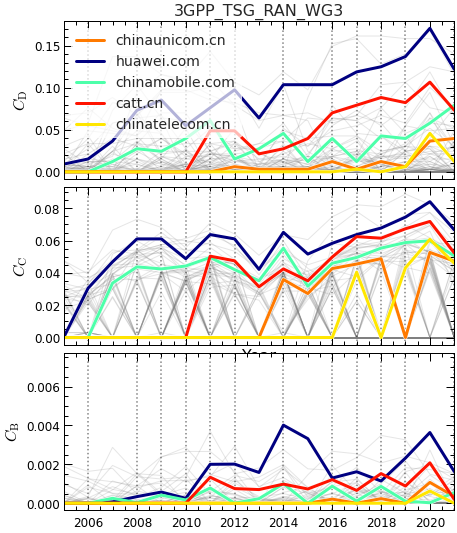

In [4]:
fig, axis = plt.subplots(
    3,
    1,
    figsize=(7, 9),
    sharex=True,
    sharey="row",
    facecolor="w",
    edgecolor="k",
)
fig.subplots_adjust(
    hspace=0.05,
    wspace=0.0,
)

lines.evolution_of_graph_property_by_domain(
    dic_dg,
    "year",
    "degree_centrality",
    entity_in_focus=eois,
    ax=axis[0],
)
lines.evolution_of_graph_property_by_domain(
    dic_cc,
    "year",
    "closeness_centrality",
    entity_in_focus=eois,
    ax=axis[1],
)
lines.evolution_of_graph_property_by_domain(
    dic_bc,
    "year",
    "betweenness_centrality",
    entity_in_focus=eois,
    ax=axis[2],
)
for yr in standard_release_year:
    axis[0].axvline(x=yr, linestyle=":", color="k", alpha=0.5, zorder=0)
    axis[1].axvline(x=yr, linestyle=":", color="k", alpha=0.5, zorder=0)
    axis[2].axvline(x=yr, linestyle=":", color="k", alpha=0.5, zorder=0)

axis[0].set_xlim(2005, 2021)
axis[1].set_xlim(2005, 2021)
axis[2].set_xlim(2005, 2021)

axis[0].set_title(mlist_name)
axis[1].set_xlabel("Year")
axis[0].set_ylabel(r"$C_{\rm D}$")
axis[1].set_ylabel(r"$C_{\rm C}$")
axis[2].set_ylabel(r"$C_{\rm B}$")
axis[0].legend(loc=2, edgecolor="white", facecolor="white", framealpha=0.7)

"""
plt.savefig(
    f"connectivity_domain_{mlist_name}.png",
    format='png',
    transparent=True,
    dpi=300,
    bbox_inches='tight',
)#"""